# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

In [0]:
logsize = np.logspace(0.3, 3.3, num = 50, dtype=int)
logsize

array([   1,    2,    2,    3,    3,    4,    4,    5,    6,    7,    8,
          9,   10,   12,   14,   16,   19,   21,   25,   29,   33,   38,
         44,   51,   58,   67,   77,   89,  103,  118,  137,  157,  181,
        209,  240,  277,  319,  367,  423,  487,  561,  645,  743,  856,
        986, 1135, 1307, 1505, 1732, 1995])

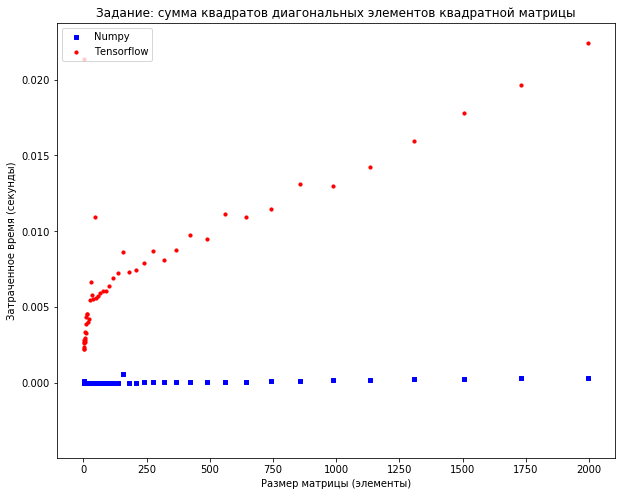

In [0]:
import time

#Сумма квадратов диагональных элементов квадратной матрицы
tfSum = []
tf.reset_default_graph()
with tf.Session() as sess:
    for n in logsize:
        x = tf.placeholder("int32", shape = None)
        y = tf.random_uniform(x, minval=0, maxval=100, dtype=tf.dtypes.int32, seed = 42)
        X = sess.run(y, feed_dict={x: [n, n]})
        x_diag = tf.linalg.tensor_diag_part(X)
        dot = tf.reduce_sum(tf.square(x_diag))
        begin = time.time()
        _ = sess.run(dot)
        end = time.time()
        tfSum.append(end-begin)

# The same but for numpy
npSum = []
np.random.seed(42)
for n in logsize:
    X = np.random.randint(0, 100, (n, n))
    begin = time.time()
    x_diag = np.diag(X)
    _ = np.sum(np.dot(x_diag, x_diag))
    end = time.time()
    npSum.append((end - begin))


plt.figure(figsize=(10,8))
plt.scatter(x = logsize, y = npSum, s=10, c='b', marker="s", label='Numpy')
plt.scatter(logsize, tfSum, s=10, c='r', marker="o", label='Tensorflow')
plt.legend(loc='upper left')
plt.xlabel('Размер матрицы (элементы)')
plt.ylabel('Затраченное время (секунды)')
plt.title('Задание: сумма квадратов диагональных элементов квадратной матрицы') 
plt.show()

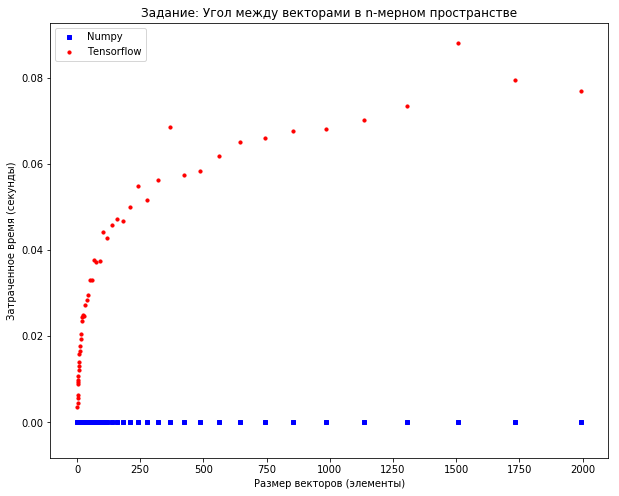

In [0]:
#Угол между векторами в n-мерном пространстве
tfSum = []
tf.reset_default_graph()
with tf.Session() as sess:
    for n in logsize:
        x = tf.placeholder(dtype=tf.dtypes.int32)
        y = tf.placeholder(dtype=tf.dtypes.int32)
        X = tf.random_uniform(x, minval=0, maxval=100, dtype=tf.dtypes.float32, seed = 12)
        Y = tf.random_uniform(y, minval=0, maxval=100, dtype=tf.dtypes.float32, seed = 13)
        rX, rY = sess.run([X, Y], feed_dict={x: [1, n], y: [1, n]})
        dot = tf.tensordot(rX, tf.transpose(rY), 1)
        x_norm = tf.linalg.norm(rX)
        y_norm = tf.linalg.norm(rY)
        res = tf.acos(dot / (x_norm * y_norm))
        begin = time.time()
        _ = sess.run(res)
        end = time.time()
        tfSum.append(end-begin)



npSum = []
np.random.seed(42)
for n in logsize:
    x = np.random.uniform(0, 100, n)
    y = np.random.uniform(0, 100, n)
    begin = time.time()
    _ = np.arccos(np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y)))
    end = time.time()
    npSum.append(end - begin)


plt.figure(figsize=(10,8))
plt.scatter(x = logsize, y = npSum, s=10, c='b', marker="s", label='Numpy')
plt.scatter(logsize, tfSum, s=10, c='r', marker="o", label='Tensorflow')
plt.legend(loc='upper left')
plt.xlabel('Размер векторов (элементы)')
plt.ylabel('Затраченное время (секунды)')
plt.title('Задание: Угол между векторами в n-мерном пространстве') 
plt.show()

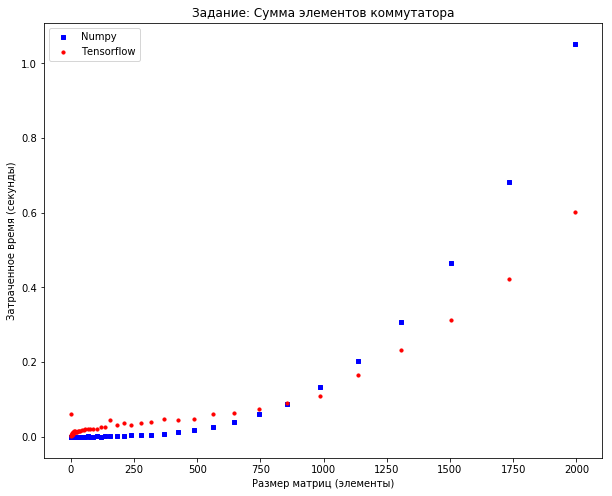

In [0]:
#Сумма элементов коммутатора
tfSum = []
tf.reset_default_graph()
with tf.Session() as sess:
    for n in logsize:
        x = tf.placeholder(dtype=tf.dtypes.int32, shape = (n, n))
        y = tf.placeholder(dtype=tf.dtypes.int32, shape = (n, n))
        X = tf.random_uniform(shape = (n, n), minval=0, maxval=100, dtype=tf.dtypes.float32, seed = 42)
        Y = tf.random_uniform(shape = (n, n), minval=0, maxval=100, dtype=tf.dtypes.float32, seed = 43)
        rX, rY = sess.run([X, Y])
        dot1 = tf.matmul(rX, rY)
        dot2 = tf.matmul(rY, rX)
        res = tf.reduce_sum(dot1 - dot2)
        begin = time.time()
        _ = sess.run(res, {x: rX, y: rY})
        end = time.time()
        tfSum.append(end-begin)

npSum = []
np.random.seed(42)
for n in logsize:
    A = np.random.uniform(0, 100, (n, n))
    B = np.random.uniform(0, 100, (n, n))
    begin = time.time()
    _ = np.sum(np.dot(A, B) - np.dot(B, A))
    end = time.time()
    npSum.append(end - begin)


plt.figure(figsize=(10,8))
plt.scatter(x = logsize, y = npSum, s=10, c='b', marker="s", label='Numpy')
plt.scatter(logsize, tfSum, s=10, c='r', marker="o", label='Tensorflow')
plt.legend(loc='upper left')
plt.xlabel('Размер матриц (элементы)')
plt.ylabel('Затраченное время (секунды)')
plt.title('Задание: Сумма элементов коммутатора') 
plt.show()

Фреймворк Numpy показывает себя быстрее в 1 и 2 заданиях. Взятие диагонали из матрицы, возведение в квадрат элементов. скалярое произведение и расчет нормы быстрее работают в Numpy, так как Numpy больше ориентирован на работу с массивами. 
В задании 3 фреймворк Tensorflow оказывается быстее Numpy при большых размерах матриц. Это может быть связано с тем, что в Tensorflow используются вычисления на графах, которые оптимально применять при перемножении и других действиях с большими матрицами. Также из рисунка видно, что график, описывающий время на Tensorflow возрастает медленнее графика Numpy.

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [0]:
from sklearn.datasets import load_digits

mnist = load_digits()

X, y = mnist.data, mnist.target

n_labels = len(np.unique(y))

Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [0]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

In [0]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

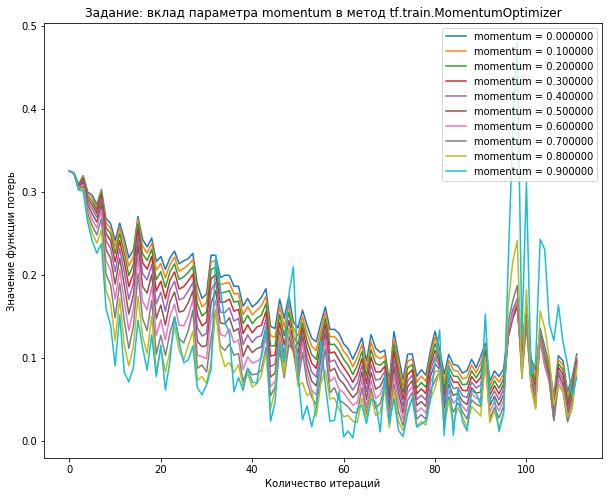

Минимальное значение функции потерь:  0.07606922 Индекс momentum:  9


In [30]:
hist = []
res_loss = []
plt.figure(figsize=(10,8))
for i in np.linspace(0, 0.9, 10):    
    train_op = tf.train.MomentumOptimizer(0.01, i).minimize(loss)
    hist = train(X, y, train_op)
    res_loss.append(hist[-1])
    plt.plot(hist, label='momentum = {:f}'.format(i))
    
plt.legend(loc='upper right')
plt.xlabel('Количество итераций')
plt.ylabel('Значение функции потерь')
plt.title('Задание: вклад параметра momentum в метод tf.train.MomentumOptimizer') 
plt.show()

print("Минимальное значение функции потерь: ",min(res_loss), "Индекс momentum: ", res_loss.index(min(res_loss)))

Ваш ответ: при значении 0.9 метод Momentum сходится к лучшему значению. При значении Momentum 0.9 функция потерь сходится быстрее, но в конце начитнает сильно колебаться. В общем случае наблюдается тенденция улучшения сходимости (сходится быстрее) при увеличении Momentum, но также возрастает количество скачков и колебаний в графике.

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

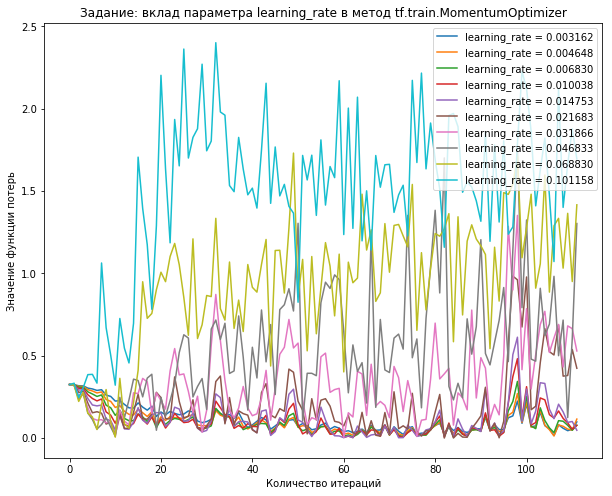

Минимальное значение функции потерь:  0.04714292 Индекс learning_rate:  4


In [31]:
hist = []
res_loss = []
plt.figure(figsize=(10,8))
for i in np.logspace(-1.5, 0.005, 10) / 10.:    
    train_op = tf.train.MomentumOptimizer(i, 0.9).minimize(loss)
    hist = train(X, y, train_op)
    res_loss.append(hist[-1])
    plt.plot(hist, label='learning_rate = {:f}'.format(i))

plt.legend(loc='upper right')
plt.xlabel('Количество итераций')
plt.ylabel('Значение функции потерь')
plt.title('Задание: вклад параметра learning_rate в метод tf.train.MomentumOptimizer') 
plt.show()

print("Минимальное значение функции потерь: ",min(res_loss), "Индекс learning_rate: ", res_loss.index(min(res_loss)))

Ваш ответ: при небольшом увеличении learning rate скорость сходимости улучшается. Но при слишком большом learning rate функция сходится значительно хуже. Оптимальный вариант - 0.015.

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

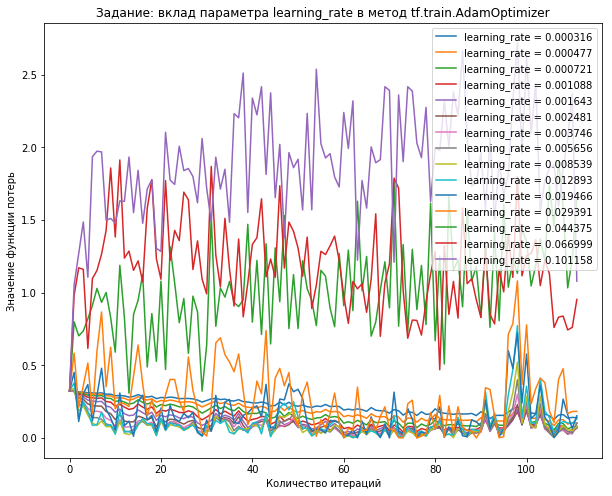

Минимальное значение функции потерь:  0.06840457 Индекс learning_rate:  4


In [50]:
hist = []
res_loss = []
plt.figure(figsize=(10,8))
for i in np.logspace(-2.5, 0.005, 15) / 10.:    
    train_op = tf.train.AdamOptimizer(i).minimize(loss)
    hist = train(X, y, train_op)
    res_loss.append(hist[-1])
    plt.plot(hist, label='learning_rate = {:f}'.format(i))
    
plt.legend(loc='upper right')
plt.xlabel('Количество итераций')
plt.ylabel('Значение функции потерь')
plt.title('Задание: вклад параметра learning_rate в метод tf.train.AdamOptimizer') 
plt.show()

print("Минимальное значение функции потерь: ",min(res_loss), "Индекс learning_rate: ", res_loss.index(min(res_loss)))

Ваш ответ: при большом увеличении learning rate функция сходится хуже. Наилучший результат достигается при небольшом learning rate ~ 0.0016.

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

Значение функции потерь алгоритма Adam: 0.06832373
Значение функции потерь алгоритма Momentum: 0.05690862


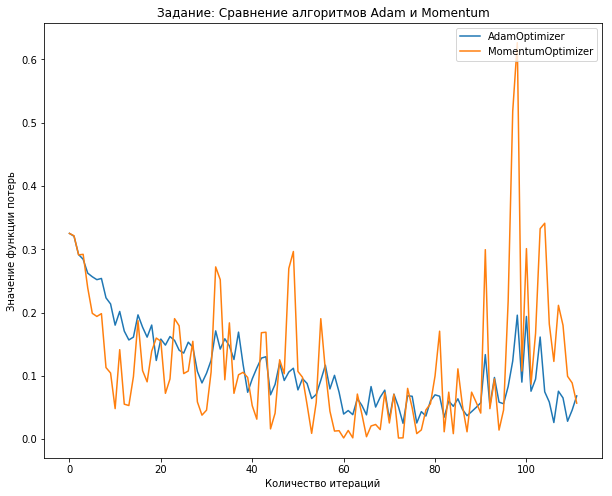

In [51]:
plt.figure(figsize=(10,8))
hist = []
train_op = tf.train.AdamOptimizer(0.0016).minimize(loss)
hist = train(X, y, train_op)
plt.plot(hist, label='AdamOptimizer')
print ("Значение функции потерь алгоритма Adam:", hist[-1])

hist = []
train_op = tf.train.MomentumOptimizer(0.015, 0.9).minimize(loss)
hist = train(X, y, train_op)
plt.plot(hist, label='MomentumOptimizer')
print ("Значение функции потерь алгоритма Momentum:", hist[-1])

plt.legend(loc='upper right')
plt.xlabel('Количество итераций')
plt.ylabel('Значение функции потерь')
plt.title('Задание: Сравнение алгоритмов Adam и Momentum') 
plt.show()

Ваш ответ: Алгоритм Momentum сильно флактурирует, изначально сходится быстрее, но значения его функции потерь сильно колеблются. У алгоритма Adam сходимость медленнее, но качественнее, без заметных колебаний. Поэтому алгоритм Adam показывает себя лучше (по сходимости, но не по конечному значению функции потерь).

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [3]:
from mnist import load_dataset

X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

In [0]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

In [53]:
from sklearn.metrics import accuracy_score
tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(3):
            loss_history_train = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_train[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", accuracy_score(y_test, prediction_history))
    return loss_history_train, loss_history_test

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]
n_labels = len(np.unique(y))
layer1 = tf.layers.dense(X_input, 512, activation=tf.nn.relu)#функция активации - relu, количество нейронов в скрытом слое - 512
logits = tf.layers.dense(layer1, n_labels)
predicted = tf.nn.log_softmax(logits)#вероятность классов определяет функция log_softmax

loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels=tf.one_hot(y_input, depth=n_labels), logits=logits)#функция потерь - softmax_cross_entropy_with_logits_v2
train_op = tf.train.AdamOptimizer(learning_rate=0.0016).minimize(loss)#алгоритм оптимизации - AdamOptimizer с наилучшим параметром
loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

Test accuracy:  0.9752


В этом задании мне пришлось изменить количество эпох в функции train_and_validate, чтобы достигнуть необходимой точности. До изменения количества эпох конечный результат варьировался , но не привышал 0.97 accuracy в зависимости от функции активации, функции потерь и алгоритма оптимизации. 
За одну эпоху нейронная сеть не успевала обучиться и подобрать нужные веса.

При количестве эпох = 3 получилось достигнуть accuracy 0.9752

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS3ilH64b3CR-jsUEyyMa7dWPOzHjL7fqfA3rs1FNMaRphcaubRyQ)

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

Сложно воспринимать информацию курса только по видео, мало очного общения и обсуждения вопросов из онлайн лекций.